In [1]:
import numpy as np
import torch
import os
import matplotlib.pyplot as plt
import random

In [2]:
def getMyEmb(original_emb):
    
    tmp = torch.FloatTensor(original_emb)
    tmp = torch.mean(tmp, dim=0)
    tmp = torch.nn.functional.normalize(tmp, p=2, dim=0)
    
    return tmp

In [3]:
DA_LIST = 'data/testset_distribution_list.txt'
DA_PATH_ORIGINAL = '../vox_emb/test'
DA_PATH_PROCESSED = 'exp_emb/MyLinearNetv2_Exp6-2/emb_test'

# DA_LIST = 'data/trainset_distribution_list.txt'
# DA_PATH_ORIGINAL = '../vox_emb/train'
# DA_PATH_PROCESSED = 'exp_emb/MyLinearNetv2_Exp6-2/emb_train'

with open(DA_LIST) as f:
    lines = f.readlines()

# # IF TRAIN SET -> USE SMALL AMOUNT
# lines1 = lines[0:len(lines)//2]
# lines2 = lines[len(lines)//2:]
# tmp_lines1 = random.sample(lines1, len(lines1)//100)
# tmp_lines2 = random.sample(lines2, len(lines2)//100)
# lines = list()
# lines.extend(tmp_lines1)
# lines.extend(tmp_lines2)


same_cat_dist_original = []
diff_cat_dist_original = []
same_cat_dist_processed = []
diff_cat_dist_processed = []

for idx, l in enumerate(lines):
    tokens = l.strip().split()
    flag = tokens[3]
    file1 = tokens[1]
    file2 = tokens[2]
    
    emb1 = np.load(os.path.join(DA_PATH_ORIGINAL, file1))
    emb2 = np.load(os.path.join(DA_PATH_ORIGINAL, file2))
    
    emb1 = getMyEmb(emb1)
    emb2 = getMyEmb(emb2)
    
    # # L2 distance
    # dist = torch.dist(emb1, emb2).item()
    
    # cosine simliarity
    dist = 1 - torch.nn.functional.cosine_similarity(emb1, emb2, dim=0).item()
    
    if flag == '1':
        same_cat_dist_original.append(dist)
    else:
        diff_cat_dist_original.append(dist)
    
    print('\r({}/{})'.format(idx+1, len(lines)), end='')

print()

with open(DA_LIST) as f:
    lines = f.readlines()

# # IF TRAIN SET -> USE SMALL AMOUNT
# lines1 = lines[0:len(lines)//2]
# lines2 = lines[len(lines)//2:]
# tmp_lines1 = random.sample(lines1, len(lines1)//100)
# tmp_lines2 = random.sample(lines2, len(lines2)//100)
# lines = list()
# lines.extend(tmp_lines1)
# lines.extend(tmp_lines2)


for idx, l in enumerate(lines):
    tokens = l.strip().split()
    flag = tokens[3]
    file1 = tokens[1]
    file2 = tokens[2]
    
    emb1 = np.load(os.path.join(DA_PATH_PROCESSED, file1))
    emb2 = np.load(os.path.join(DA_PATH_PROCESSED, file2))
    
    emb1 = torch.FloatTensor(emb1)
    emb2 = torch.FloatTensor(emb2)
    
    # # L2 distance
    # dist = torch.dist(emb1, emb2).item()
    
    # cosine simliarity
    dist = 1 - torch.nn.functional.cosine_similarity(emb1, emb2, dim=0).item()
    
    if flag == '1':
        same_cat_dist_processed.append(dist)
    else:
        diff_cat_dist_processed.append(dist)
    
    print('\r({}/{})'.format(idx+1, len(lines)), end='')

print()

(4494/4494)
(4494/4494)


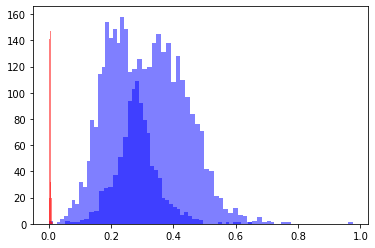

In [4]:
plt.hist(same_cat_dist_original, bins=60, histtype='stepfilled', color='blue', alpha=0.5)
plt.hist(diff_cat_dist_original, bins=60, histtype='stepfilled', color='blue', alpha=0.5)

plt.hist(same_cat_dist_processed, bins=60, histtype='stepfilled', color='red', alpha=0.5)
plt.hist(diff_cat_dist_processed, bins=60, histtype='stepfilled', color='red', alpha=0.5)
plt.show()

In [8]:
# COMPARE PROCESSED

# DA_LIST = 'data/testset_distribution_list.txt'

# DA_PATH_PROCESSED1 = 'exp_emb/MyLinearNetv2_Exp5-3/emb_test'
# DA_PATH_PROCESSED1 = 'exp_emb/MyLinearNetv2_Exp6/emb_test'

# DA_PATH_PROCESSED2 = 'exp_emb/MyLinearNetv2_Exp6-1/emb_test'
# DA_PATH_PROCESSED2 = 'exp_emb/MyLinearNetv2_Exp6-2/emb_test'



DA_LIST = 'data/trainset_distribution_list.txt'

# DA_PATH_PROCESSED1 = 'exp_emb/MyLinearNetv2_Exp6-1/emb_train'
# DA_PATH_PROCESSED1 = 'exp_emb/MyLinearNetv2_Exp6/emb_train'
DA_PATH_PROCESSED1 = 'exp_emb/MyLinearNetv2_Exp5-3/emb_train'

# DA_PATH_PROCESSED2 = 'exp_emb/MyLinearNetv2_Exp6/emb_train'
DA_PATH_PROCESSED2 = 'exp_emb/MyLinearNetv2_Exp6-1/emb_train'
# DA_PATH_PROCESSED2 = 'exp_emb/MyLinearNetv2_Exp6-2/emb_train'

with open(DA_LIST) as f:
    lines = f.readlines()

# IF TRAIN SET -> USE SMALL AMOUNT
lines1 = lines[0:len(lines)//2]
lines2 = lines[len(lines)//2:]
tmp_lines1 = random.sample(lines1, len(lines1)//10)
tmp_lines2 = random.sample(lines2, len(lines2)//10)
lines = list()
lines.extend(tmp_lines1)
lines.extend(tmp_lines2)

same_cat_dist_p1 = []
diff_cat_dist_p1 = []
same_cat_dist_p2 = []
diff_cat_dist_p2 = []

for idx, l in enumerate(lines):
    tokens = l.strip().split()
    flag = tokens[3]
    file1 = tokens[1]
    file2 = tokens[2]
    
    emb1 = np.load(os.path.join(DA_PATH_PROCESSED1, file1))
    emb2 = np.load(os.path.join(DA_PATH_PROCESSED1, file2))
    
    emb1 = torch.FloatTensor(emb1)
    emb2 = torch.FloatTensor(emb2)
    
    # # L2 distance
    # dist = torch.dist(emb1, emb2).item()
    
    # cosine simliarity
    dist = 1 - torch.nn.functional.cosine_similarity(emb1, emb2, dim=0).item()
    
    if flag == '1':
        same_cat_dist_p1.append(dist)
    else:
        diff_cat_dist_p1.append(dist)
    
    print('\r({}/{})'.format(idx+1, len(lines)), end='')

print()

with open(DA_LIST) as f:
    lines = f.readlines()

# IF TRAIN SET -> USE SMALL AMOUNT
lines1 = lines[0:len(lines)//2]
lines2 = lines[len(lines)//2:]
tmp_lines1 = random.sample(lines1, len(lines1)//10)
tmp_lines2 = random.sample(lines2, len(lines2)//10)
lines = list()
lines.extend(tmp_lines1)
lines.extend(tmp_lines2)

for idx, l in enumerate(lines):
    tokens = l.strip().split()
    flag = tokens[3]
    file1 = tokens[1]
    file2 = tokens[2]
    
    emb1 = np.load(os.path.join(DA_PATH_PROCESSED2, file1))
    emb2 = np.load(os.path.join(DA_PATH_PROCESSED2, file2))
    
    emb1 = torch.FloatTensor(emb1)
    emb2 = torch.FloatTensor(emb2)
    
    # # L2 distance
    # dist = torch.dist(emb1, emb2).item()
    
    # cosine simliarity
    dist = 1 - torch.nn.functional.cosine_similarity(emb1, emb2, dim=0).item()
    
    if flag == '1':
        same_cat_dist_p2.append(dist)
    else:
        diff_cat_dist_p2.append(dist)
    
    print('\r({}/{})'.format(idx+1, len(lines)), end='')

print()

(100890/100890)
(100890/100890)


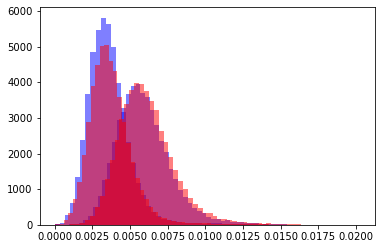

In [9]:
plt.hist(same_cat_dist_p1, bins=60, histtype='stepfilled', color='blue', alpha=0.5)
plt.hist(diff_cat_dist_p1, bins=60, histtype='stepfilled', color='blue', alpha=0.5)

plt.hist(same_cat_dist_p2, bins=60, histtype='stepfilled', color='red', alpha=0.5)
plt.hist(diff_cat_dist_p2, bins=60, histtype='stepfilled', color='red', alpha=0.5)
plt.show()

# plt.hist(same_cat_dist_p1, bins=60, histtype='step', color='blue')
# plt.hist(diff_cat_dist_p1, bins=60, histtype='step', color='blue')

# plt.hist(same_cat_dist_p2, bins=60, histtype='step', color='red')
# plt.hist(diff_cat_dist_p2, bins=60, histtype='step', color='red')
# plt.show()